# <center>Figures: transfer sets</center>
## <center>Figures of the book *Mathematical methods of choice and matching models*</center>
### <center>Alfred Galichon (NYU+ScPo)</center>


# References

* Gabrielle Demange and David Gale (1985). "The Strategy Structure of Two-Sided Matching Markets". *Econometrica*  53 no. 4, pp. 873-888.
* Alvin Roth and Marilda Sotomayor (1990). *Two-sided matching. A Study in Game-Theoretic Modeling and Analysis.* Econometric Society Monographs.
* Alfred Galichon, Scott Kominers, and Simon Weber (2019). "Costly Concessions: An Empirical Framework for Matching with Imperfectly Transferable Utility." *Journal of Political Economy* 127 no. 6, pp. 2875-2925.


# Bargaining whithin a pair
In order to study the matching problem, we need to first study the bargaining possibilities within a matched pair. For now we shall drop the subscripts $x$ and $y$, and we will study the set of utilities $(U,V)$ that the worker and the firm can obtain as an outcome of that bargaining. This set is called *feasible utility set*, or *bargaining set*.

Most of the material in this lecture is taken from Galichon, Kominers and Weber (2019).

## Feasible utilities

For each value of $w$ (nominal wage), compute<br>
$\left\{
\begin{array}{l}
U \text{ = utility of the worker}\\
V\text{ = utility of the firm}
\end{array}
\right.$

In the transferable utility case (Becker-Shapley-Shubik),<br>
$\left\{
\begin{array}{l}
U(w) = \alpha + w\\
V(w) = \gamma -w,
\end{array}
\right.$<br>
but in general, we shall assume that $\mathcal{U}\left( w\right)$ and $\mathcal{U}\left( w\right)$  are nondecreasing (resp. nonincreasing) and continuous, not necessarily linear.



## The feasible utility set
Given a worker-firm pair, define $\mathcal{F}$ the feasible utility set as:

$\mathcal{F}=\left\{ \left( U,V\right) :\exists w,U\leq U\left(
w\right) ,V\leq V\left( w\right) \right\} $.

equivalently, if $\mathcal{U}$ is strictly increasing

$\mathcal{F}=\left\{ \left( U,V\right) :V\leq V\left( U
^{-1}\left( U\right) \right) \right\} .$

Note that we are assuming free disposal: if $(U,V)$ is feasible and if $U' \leq U$ and $V' \leq V$, then $(U',V')$ is feasible.

Also, $w$ does not have to be a wage; it can be the set of terms of a contract.

## Frontier of the feasible utility set

We define the *frontier* of the feasible utility sets as the set of points $(U,V)\in \mathcal{F}$ such that there is no point $(U',V')\in \mathcal{F}$ with<br>
$U' < U$ and $V' < V$.

**Caution here**. This coincides with the *topological frontier* which is defined as the intersection of the closures of the interior and exterior of the set, but not with the *set of Pareto efficient points*, which is in general a subset of the former. Indeed, the set of Pareto efficient points is the set of points $(U,V)\in \mathcal{F}$ such that there is no point $(U',V')\in \mathcal{F}$ with<br>
$U' \leq U$ and $V' \leq V$, with at least one strict inequality.<br>
In particular, if $\mathcal{F} = (U,V): U\leq 1~and~V\leq 1$, the topological frontier is union of the set $\{U=1,V\leq 1\}$ and $\{U\leq 1, V=1\}$, while the set of Pareto efficient points is $(1,1)$.<br>
This distinction will be important when we discuss model with non-transferable utility.


## Distance-to-frontier function


Given a feasible set $\mathcal{F}$, compute the distance to the frontier of $\mathcal{F}$ along the diagonal, with a minus sign if in the interior, and a plus sign if it is not.<br>
<br>
Define the *distance-to-frontier* function as<br>
$D(U,V)=\min\{t∈R:(U-t,V-t)∈F\}$<br>

This way:<br>
$D(U,V) \leq 0 $ means that $(U,V)\in\mathcal{F},$<br>
while<br>
$D(U,V) = 0 $ means that $(U,V)$ is on the frontier of $\mathcal{F}$.

**Property**. For $a \in \mathbb{R}$, we have $D(U+a,V+a)=D(U,V)+a$.

## Parameterization of the frontier of the feasible set

We can define $\delta = U-V$ and get an explicit parameterization on the frontier of the feasible set as a function of $\delta$.<br> 
$D(\mathcal{U}(\delta) , \mathcal{U}(\delta) - \delta) =0$ and<br>
$D(\mathcal{V}(\delta) + \delta, \mathcal{V}(\delta) ) =0$<br> 
thus<br>
$\left\{
\begin{array}[l]
~\mathcal{U}\left( \delta \right) = - D(0,-\delta)\\
\mathcal{V}\left( \delta \right) = - D(\delta,0)
\end{array}
\right.
$<br>



In [1]:
import numpy as np
import sympy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import os, math

In [2]:
Ucalf = lambda D: (lambda w: -D(0,-w) )
Vcalf = lambda D: (lambda w: -D(w,0) )

def plot_feasible(D,range = (-1,1), figname = 'figure'):
    δs = np.linspace(range[0],range[1],num=500)
    Ucal,Vcal = np.vectorize(Ucalf(D)),np.vectorize(Vcalf(D))
    us = [Ucal(δ) for δ in δs]
    vs = [Vcal(δ) for δ in δs]
    umin,vmin = min(us),min(vs)
    umax,vmax = max(us),max(vs)
    plt.figure(figsize=(4, 4))
    plt.xlim([umin, umax+(umax-umin)/3])
    plt.ylim([vmin, vmax+(vmax-vmin)/3])
    plt.plot(us,vs,'black')
    plt.xlabel('U')
    plt.ylabel('V')
    plt.fill(us+[np.min(us)],vs+[np.min(vs)])
    
    plt.savefig('transfer-sets/'+figname)
    plt.show()
    


## Some examples
### Example 1:  transferable utility (TU)
 
* The Becker model assumes  *additively transferable utility*: it is a model of marriage in which utility can freely be transferred across partners, in a one-to-one manner.<br>
$\left\{
\begin{array}
\mathcal{U}\left( w\right) =\alpha +w \\
\mathcal{V}\left( w\right) =\gamma -w
\end{array}
\right.
$<br>
and thus, denoting $\Phi = \alpha +\gamma$,<br>
$\mathcal{F}=\left\{ \left( U,V\right) :u+v\leq \Phi \right\} $<br>


* The distance=to-frontier in the transferable utility case is<br>
$D(U,V) = \frac {U+V - \Phi} {2}.$

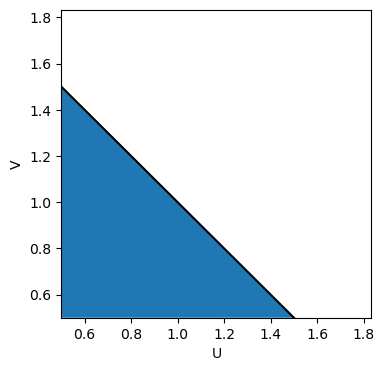

In [3]:
def create_D_TU(Φ):
    return (lambda U,V : (U+V - Φ)/2)

plot_feasible(create_D_TU(2),figname = 'tu')

### Example 2: non-transferable utility (NTU)

* **Motivation: housing market with price controls.** In the model of *non-transferable utility,* no transfer attempt can be beneficial to the other side of the market. In that case, denote $(\alpha,\gamma)$ the only Pareto efficient point, and due to free disposal:<br>
$\mathcal{F=}\left\{ \left( U,V\right) :U\leq \alpha \text{ and }V\leq
\gamma \right\}. $<br>

* The distance-to-frontier is the scalar $t\in\mathbb{R}$ such that
$\max \left( U-\alpha ,V-\gamma \right) -t = 0$, hence:<br>
$D\left( U,V\right) =\max \left( U-\alpha ,V-\gamma \right) $<br>



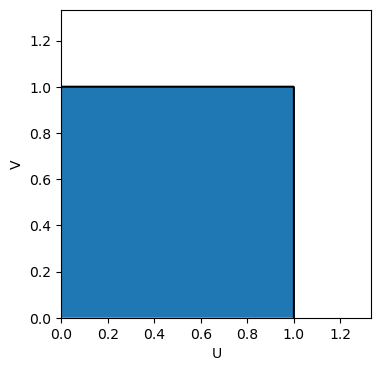

In [4]:
def create_D_NTU(α,γ):
    return (lambda U,V : np.maximum(U - α ,V -γ ))

plot_feasible(create_D_NTU(1,1),figname = 'ntu' )

### Example 3: linearly transferable utility (LTU)

* **Motivation: labor matching with flat tax**. Consider a model of the labor market with proportional taxation, where the tax rate is $\tau$. We have<br>
$ U-\alpha = (1 - \tau) (\gamma - V) $<br>
then, setting $\lambda = 1 /(2 - \tau)$, one has<br>
$\mathcal{F=}\left\{ \left( U,V\right) :\lambda U + (1-\lambda) V \leq  \Phi \right\},$<br>
where $\Phi = \lambda \alpha + (1-\lambda) \gamma $.

* As a result, the distance function is<br>
$D(U,V) = \lambda U + (1-\lambda) V - \Phi).$

In [5]:
def create_D_LTU(α,γ,λ):
    return (lambda U,V : λ*(U-α)+(1-λ)*(V-γ))

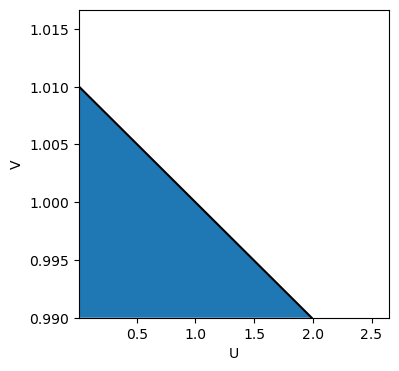

In [6]:
plot_feasible(create_D_LTU(1,1,0.01),figname = 'ltu-0')

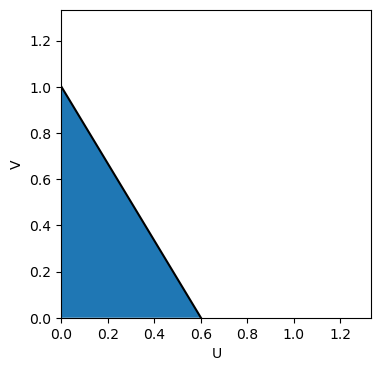

In [7]:
us = [0.0,0.6]
vs = [1.0,0.0]
umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.plot(us,vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[0.0],vs+[0.0])

plt.savefig('transfer-sets/ltu')
plt.show()

### Example 4: exponentially transferable utility (ETU)

* **Motivation: household bargaining with private consumption.** We consider a model of marriage in which we model intra-household bargaining with private consumption and match amenity.

* A match yield amenity $\alpha$ to man $i$ and utility $\gamma$ to woman $j$, and private consumptions are denoted $c^{i}$ and $c^{j}$.<br>

* The utilities are formed as a combination of the log-consumptions and the match amenities:<br>
 $\left\{
\begin{array}[l]
~U = \tilde{\alpha} +\tau \log c^{i}\\
V = \tilde{\gamma} +\tau \log c^{j}
\end{array}
\right.
$<br>
where the private consumptions are subject to the budget constraint $c^{i}+c^{j}=B$, where $B$ is the joint budget of the household.<br>

* We have $c^{i}=\exp \left( \frac{U-\tilde{\alpha} }{\tau }\right) $ and $c^{j}=\exp \left( \frac{V-\tilde{\gamma} }{\tau }\right) $ and thus the budget constraint rewrites:<br>
$\exp \left( \frac{U- \tilde{\alpha} }{\tau }\right) +\exp \left( \frac{V-\tilde{\gamma} }{\tau }\right) \leq B$<br>
and setting $\alpha = \tilde{\alpha} + \tau \log B$ and $\gamma = \tilde{\gamma} + \tau \log B$, we obtain:<br>
$\mathcal{F=}\left\{ \left( U,V\right) :\exp \left( \frac{U- \alpha }{\tau }%
\right) +\exp \left( \frac{V-\gamma }{\tau }\right) \leq 2\right\} $<br>

* The distance function can be obtained as<br> 
$D(U,V) = \tau \log \left( \frac {\exp(\frac{ U-\alpha} {\tau} ) + \exp(\frac {V - \gamma} {\tau}) } {2} \right)$

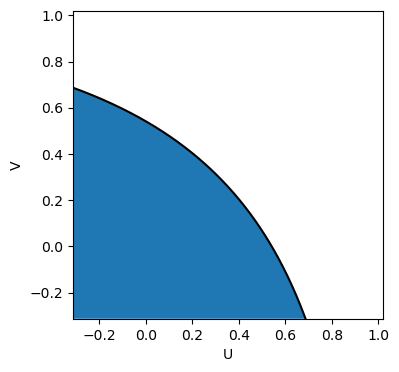

In [8]:
def create_D_ETU(α,γ,τ):
    return (lambda U,V : τ * np.log(np.exp( (U - α ) / τ ) + np.exp ((V -γ ) / τ )) )

plot_feasible(create_D_ETU(1,1,1),figname = 'etu_1')


### Example 4 (continued): limits of the ETU case
**Remarks.**
* When $\tau \rightarrow +\infty $, we get at first order in $1 / \tau$<br>

    $2+\frac{U-\alpha }{\tau }+\frac{V-\gamma }{\tau }\leq 2$<br>

    which in the limit of a very large $\tau$, yields $U+V\leq \alpha +\gamma $, the transferable utility case.<br>

* When $\tau \rightarrow 0$, we get<br>
    $\tau \log \left( \exp \left( \frac{U-\alpha }{\tau }\right) +\exp \left( 
\frac{V-\gamma }{\tau }\right) \right) \leq \tau \log 2$<br>

    which in the limit when $\tau$ tends to zero, yields $\max \left\{ U-\alpha ,V-\gamma \right\} \leq 0$, the non-transferable utility case.<br>


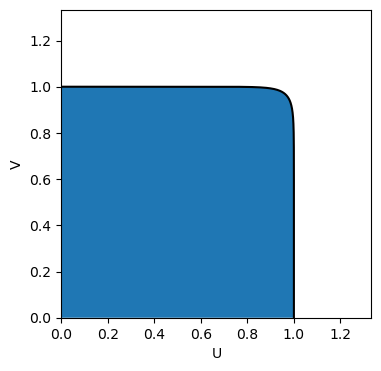

In [9]:
plot_feasible(create_D_ETU(1,1,0.05),figname = 'etu_005')

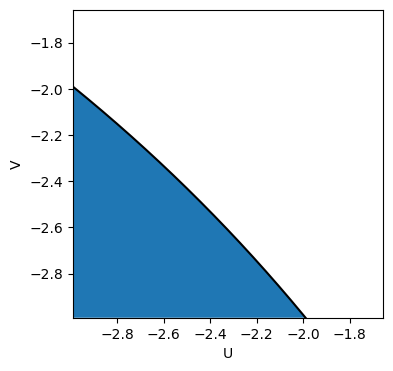

In [10]:
plot_feasible(create_D_ETU(1,1,5),figname = 'etu_5')

### Example 5: union of feasible sets

* **Motivation: household bargaining with public goods**. Consider a model of marriage where partners make a joint decision on a public good $g\in G$ e.g. the number of kids; buying a house, etc.<br>

* Assume that conditional on $g\in G$, the utilities are<br>
 $\left\{
\begin{array}[l]
~U=\alpha ^{g}\left( w\right)\text{ increasing}\\
V=\gamma ^{g}\left( w\right)\text{ decreasing}
\end{array}
\right.
$<br>
where $w$ is the term of match - say the share of private consumption that
goes to the man.<br>

* We can compute the *conditional feasible set*<br>
$\mathcal{F}^{g}\mathcal{=}\left\{ \left( U,V\right) :U\leq \alpha
^{g}\left( \left( \gamma ^{g}\right) ^{-1}\left( V\right) \right) \right\} $<br>

* The overall feasible set is the union of the conditional bargaining sets:<br>
$\mathcal{F=\cup }_{g\in G}\mathcal{F}^{g}$.<br>
$\mathcal{F=}\left\{ \left( U,V\right) :U\leq \max_{g}\alpha ^{g}\left(
\left( \gamma ^{g}\right) ^{-1}\left( V\right) \right) \right\} $<br>

* The distance function associated with the overall set is the minimum of the distance functions associated with the conditional bargaining sets:<br>
$D_{\mathcal{F}}\left( U,V\right) =\min_{g}D_{\mathcal{F}^{g}}\left(
U,V\right) $.

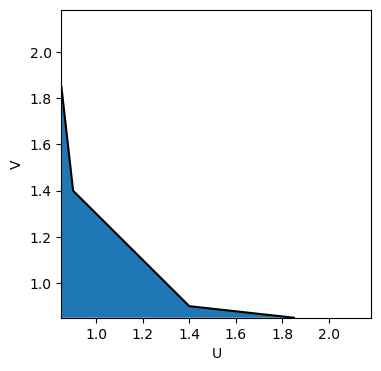

In [11]:
def create_D_union(Dlist):
    return (lambda U,V : min([D(U,V) for D in Dlist]) )

D_LTUs_bis  = [create_D_LTU(  a , b, c ) for (a,b,c) in [(0.95,0.95,0.1),(0.95,0.95,0.9),(1.15,1.15,0.5)]]


plot_feasible(create_D_union(D_LTUs_bis),figname = 'union')


### Example 6: intersection


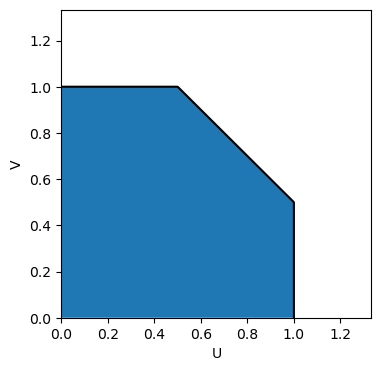

In [12]:
def create_D_inter(Dlist):
    return (lambda U,V : max([D(U,V) for D in Dlist]) )


D_LTUs_ter  = [create_D_LTU(  a , b, c ) for (a,b,c) in [(1,1,0),(1,1,1),(0.75,0.75,0.5)]]
plot_feasible(create_D_inter(D_LTUs_ter),figname = 'intersection')

# Counterexamples: NOT proper transfer sets

Not scarce:

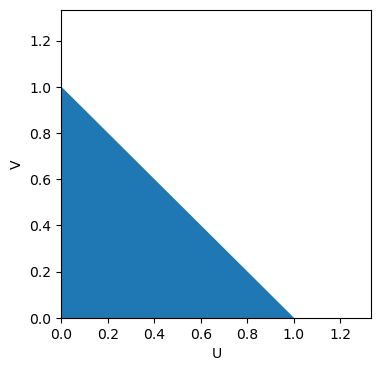

In [13]:
us = [-9.0,10.0]
vs = [10.0,-9.0]
umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[0.0],vs+[0.0])

plt.savefig('transfer-sets/non-proper-1')
plt.show()

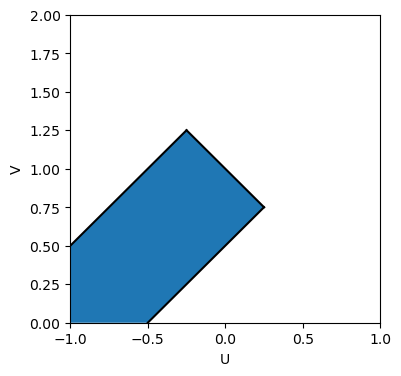

In [14]:
δs = np.linspace(-0.25,0.25,num=500)
δs_ant = np.linspace(-1.0,-0.25,num=500)
δs_post = np.linspace(-0.5,0.25,num=500)
us = [δ for δ in δs]
vs = [1-δ for δ in δs]
umin,vmin = -1.0,0.0
umax,vmax = 1.0,2.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+0*(umax-umin)/3])
plt.ylim([vmin, vmax+0*(vmax-vmin)/3])
plt.plot(us,vs,'black')
plt.plot([δ for δ in δs_ant],[δ+1.5 for δ in δs_ant],'black')
plt.plot([δ for δ in δs_post],[δ+0.5 for δ in δs_post],'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[-0.5,-1,-1],vs+[0,0,0.5])

plt.savefig('transfer-sets/non-proper-2')
plt.show()


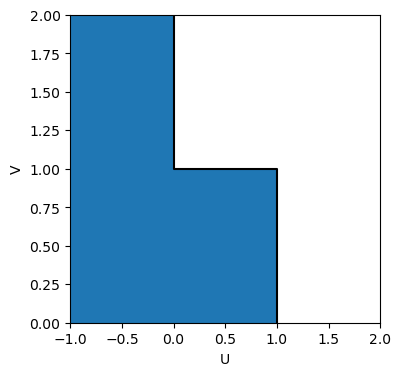

In [15]:
us = [0.0,0.0,1.0,1.0]
vs = [2.0,1.0,1.0,0.0]
umin,vmin = -1.0,0.0
umax,vmax = 2.0,2.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+0*(umax-umin)/3])
plt.ylim([vmin, vmax+0*(vmax-vmin)/3])
plt.plot(us,vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[-1.0,-1.0],vs+[0.0,2.0])

plt.savefig('transfer-sets/non-proper-3')
plt.show()

# Approximations

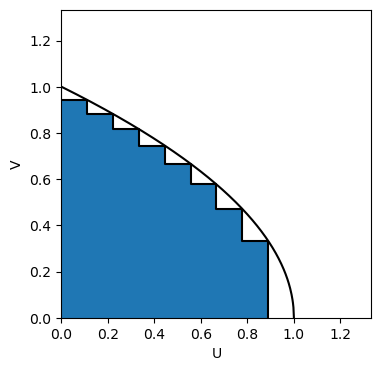

In [16]:
δs = np.linspace(0.0,1.0,num=500)
us = [δ for δ in δs]
vs = [math.sqrt(1-δ) for δ in δs]

less_δs = np.linspace(0.0,1.0,num=10)
sub_us=[]
sub_vs=[]
δprec = less_δs[0]
for δ in less_δs[1:]:
    sub_us = sub_us+[δprec,δprec]
    sub_vs = sub_vs+[math.sqrt(1-δprec),math.sqrt(1-δ)]
    δprec = δ

umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.plot(us,vs,'black')
plt.plot(sub_us,sub_vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(sub_us+[0.0],sub_vs+[0.0])

plt.savefig('transfer-sets/approx-transfer-below')
plt.show()

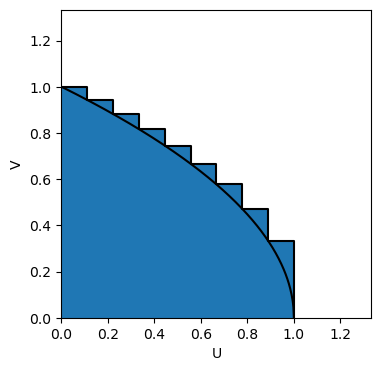

In [17]:
δs = np.linspace(0.0,1.0,num=500)
us = [δ for δ in δs]
vs = [math.sqrt(1-δ) for δ in δs]

less_δs = np.linspace(0.0,1.0,num=10)
δprec = less_δs[0]
sub_us=[δprec]
sub_vs=[math.sqrt(1-δprec)]
for δ in less_δs[1:]:
    sub_us = sub_us+[δ,δ]
    sub_vs = sub_vs+[math.sqrt(1-δprec),math.sqrt(1-δ)]
    δprec = δ

umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.plot(us,vs,'black')
plt.plot(sub_us,sub_vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(sub_us+[0.0],sub_vs+[0.0])

plt.savefig('transfer-sets/approx-transfer-above')
plt.show()

# Implicit representation

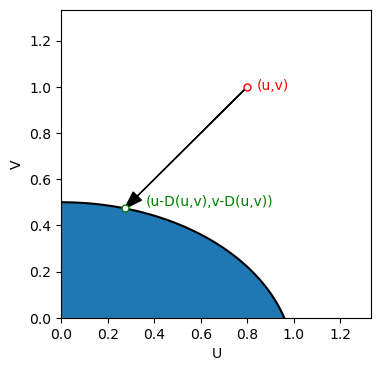

In [18]:
def D(valu,valv):
    [u,v,t] = sympy.symbols(['u','v','t'])
    return float(sympy.solve((v-t+0.2)*(v-t+0.2)-0.49*(1-(u-t)*(u-t)),t)[0].evalf(subs={u: valu, v:valv}))

valu,valv = .8,1.0
valt = D(valu,valv)

δs = np.linspace(0.0,1.0,num=500)
us = [δ for δ in δs]
vs = [0.7*math.sqrt(1-δ*δ)-0.2 for δ in δs]

less_δs = np.linspace(0.0,1.0,num=10)
δprec = less_δs[0]
sub_us=[δprec]
sub_vs=[math.sqrt(1-δprec)]
for δ in less_δs[1:]:
    sub_us = sub_us+[δ,δ]
    sub_vs = sub_vs+[math.sqrt(1-δprec),math.sqrt(1-δ)]
    δprec = δ

umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.plot(us,vs,'black')
#plt.plot(sub_us,sub_vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[0.0],vs+[0.0])

plt.plot(valu,valv,marker="o", markersize=5, markeredgecolor="red", markerfacecolor="white")
plt.text(valu+0.04, valv-0.015, '(u,v)', fontsize=10, color = 'red')
plt.arrow(valu, valv, -valt, -valt,length_includes_head=True,head_width=0.05,color= 'black')
plt.plot(valu-valt,valv-valt,marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")
plt.text(valu-valt+0.09, valv-valt+0.01, '(u-D(u,v),v-D(u,v))', fontsize=10,color='green')

plt.savefig('transfer-sets/distance-function')
plt.show()

# Explicit representation

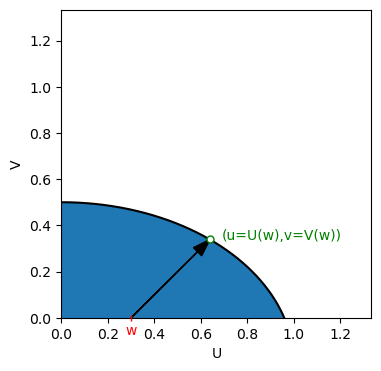

In [19]:
Ucal= lambda w : -D(0.0,-w)
Vcal= lambda w : -D(w,0.0)
w = 0.3
valu = Ucal(w)
valv = Vcal(w)

δs = np.linspace(0.0,1.0,num=500)
us = [δ for δ in δs]
vs = [0.7*math.sqrt(1-δ*δ)-0.2 for δ in δs]

less_δs = np.linspace(0.0,1.0,num=10)
δprec = less_δs[0]
sub_us=[δprec]
sub_vs=[math.sqrt(1-δprec)]
for δ in less_δs[1:]:
    sub_us = sub_us+[δ,δ]
    sub_vs = sub_vs+[math.sqrt(1-δprec),math.sqrt(1-δ)]
    δprec = δ

umin,vmin = 0.0,0.0
umax,vmax = 1.0,1.0
plt.figure(figsize=(4, 4))
plt.xlim([umin, umax+(umax-umin)/3])
plt.ylim([vmin, vmax+(vmax-vmin)/3])
plt.plot(us,vs,'black')
#plt.plot(sub_us,sub_vs,'black')
plt.xlabel('U')
plt.ylabel('V')
plt.fill(us+[0.0],vs+[0.0])

#plt.arrow(0,0, w, 0,length_includes_head=True,head_width=0.05,color= 'red')
#plt.plot([w,w],[-0.01,0.01],color= 'red')
plt.plot(w,0,marker="|", markersize=5, markeredgecolor="red", markerfacecolor="white",zorder=10,clip_on=False)
plt.text(w-0.025, -0.075, 'w', fontsize=10, color='red')
plt.arrow( w, 0,valu-w,valv,length_includes_head=True,head_width=0.05,color= 'black')
plt.text(valu+0.05, valv+0.0, '(u=U(w),v=V(w))', fontsize=10, color = 'green')
plt.plot(valu,valv,marker="o", markersize=5, markeredgecolor="green", markerfacecolor="white")


plt.savefig('transfer-sets/diagonal-parameterization')
plt.show()